# WeatherPy
----
## Observable Trends
#### Latitude vs Temperature, humidity, Cloudiness and Wind Speed
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import json


# Import API Key
from api_keys import weather_api_key

# Output File (CSV)
output_file = "WeatherPy_data_output/Cities.csv"

# Determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
LatitudeRange = (-90, 90)
LongitudeRange = (-180, 180)

## Generate Cities List

In [27]:
# List for holding Latitudes_Longitudes and Cities
Latitudes_Longitudes = []
Cities = []

# Create a set of random latitude and longitude combinations
Latitudes = np.random.uniform(low=-90.000, high=90.000, size=1500)
Longitutes = np.random.uniform(low=-180.000, high=180.000, size=1500)
Latitudes_Longitudes = zip(Latitudes, Longitutes)

# Identify nearest city for each latitude/longitude combination
for Lat_Lng in Latitudes_Longitudes:
    City = citipy.nearest_city(Lat_Lng[0], Lat_Lng[1]).city_name
    
    # If the city is unique, add it to a the cities list
    if City not in Cities:
        Cities.append(City)

# Print the city count to confirm sufficient count
print("{} cities have been identified to poll for weather".format(len(Cities)))




597 cities have been identified to poll for weather


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [62]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key +"&q="

# Cities weather data frame
Cities_df = pd.DataFrame({"City":Cities})
Cities_df["Temperature(C)"] =""
Cities_df["Humidity(%)"] =""
Cities_df["Cloudiness(%)"] =""
Cities_df["Wind Speed (kph)"] =""
Cities_df["Latitude"]=""
Cities_df["Longitude"]=""
Cities_df.head()
print("Beginning Data Retrieval")
print("------------------------")

for index, row in Cities_df.iterrows():
    city =row["City"]
    response = requests.get(url+city)
    city_weather = response.json()
    print(f"Processing Record {index} | {city}")
    
    try:
        Cities_df.loc[index,"Temperature(C)"]=city_weather['main']['temp']
        Cities_df.loc[index,"Humidity(%)"]=city_weather['main']['humidity']
        Cities_df.loc[index,"Cloudiness(%)"]=city_weather['clouds']['all']
        Cities_df.loc[index,"Wind Speed (kph)"]=city_weather['wind']['speed']
        Cities_df.loc[index,"Latitude"]=city_weather['coord']['lat']
        Cities_df.loc[index,"Longitude"]=city_weather["coord"]['lon']
        
    except (KeyError, IndexError):
        print(f"City not found... skipping.")

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

print(Cities_df)

Beginning Data Retrieval
------------------------
Processing Record 0 | kaitangata
Processing Record 1 | bambous virieux
Processing Record 2 | mataura
Processing Record 3 | khatanga
Processing Record 4 | port alfred
Processing Record 5 | bartlesville
Processing Record 6 | busselton
Processing Record 7 | sandwick
Processing Record 8 | east london
Processing Record 9 | rikitea
Processing Record 10 | salmas
Processing Record 11 | puerto ayora
Processing Record 12 | sambava
Processing Record 13 | tuy hoa
Processing Record 14 | gazipur
Processing Record 15 | hermanus
Processing Record 16 | port hardy
Processing Record 17 | fortuna
Processing Record 18 | dikson
Processing Record 19 | severo-kurilsk
Processing Record 20 | amderma
City not found... skipping.
Processing Record 21 | airai
Processing Record 22 | hluti
Processing Record 23 | nuuk
Processing Record 24 | rangkasbitung
Processing Record 25 | bayevo
Processing Record 26 | kapaa
Processing Record 27 | saint-pierre
Processing Record 28 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
# Drop cities that return blanks
Cities_df.replace("", np.nan, inplace = True)
Cities_df = Cities_df.dropna()

# Display  data frame
Cities_df.head()


,City,Temperature(C),Humidity(%),Cloudiness(%),Wind Speed (kph),Latitude,Longitude
0,kaitangata,13.95,66.0,100.0,5.85,-46.2817,169.8464
1,bambous virieux,27.14,54.0,20.0,6.69,-20.3428,57.7575
2,mataura,13.04,78.0,100.0,3.31,-46.1927,168.8643
3,khatanga,-7.72,80.0,86.0,2.90,71.9667,102.5000
4,port alfred,15.66,97.0,100.0,1.34,-33.5906,26.8910


In [64]:
# Print the total numerb of cities
print(f"There are {len(Cities_df)} cities included in this weather analyses.")

# Save data frame as csv file
Cities_df.to_csv('WeatherPy_Data_Output/CityDataOutput.csv')

There are 551 cities included in this weather analyses.


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [65]:
# Check if there are any cities with >100% humidity
CityCheck = Cities_df["Humidity(%)"].describe(include = "all")

# Print number of Cities with >100% humidity
print("Upon inspection, the maximum humidity value is 100%, so there are no values greater than 100% in the data!")

# Display stats
CityCheck

Upon inspection, the maximum humidity value is 100%, so there are no values greater than 100% in the data!


count    551.000000
mean      69.671506
std       22.664812
min        6.000000
25%       59.000000
50%       75.000000
75%       87.000000
max      100.000000
Name: Humidity(%), dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

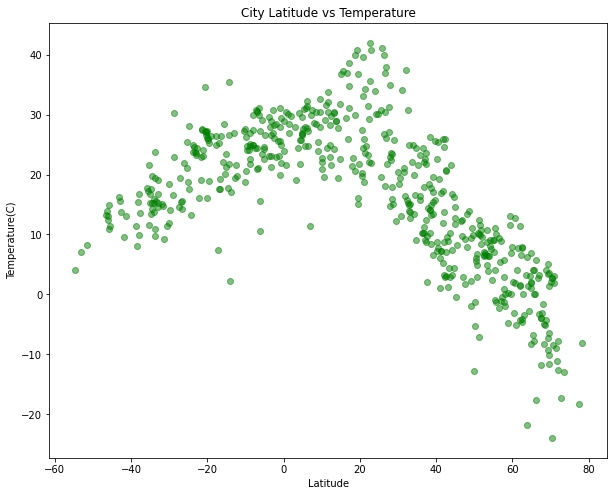

In [66]:
# Set graph size
plt.figure(figsize=(10,8))

# Create the scatter plot 'City Latitude vs Temperature'
plt.scatter(Cities_df["Latitude"], Cities_df["Temperature(C)"], color='g', alpha=0.5)

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')
plt.title(f'City Latitude vs Temperature')

# Save the scatter plot as png
plt.savefig("WeatherPy_Data_Output/LatitudeVsTemperature.png")

# Display scatter plot 'City Latitude vs Termperature'
plt.show()

Latitude specifies the north–south position of a point on the Earth's surface geographically. Latitude is an angle which ranges from 0° at the Equator to 90° at the poles. 

The Latitude vs Temperature plot indicates the closer a city is to the Equator the higher the temperature. Whereas the closer the city is to either of the poles the lower the temperature in comparison to cities close to the Equator. 

## Latitude vs. Humidity Plot

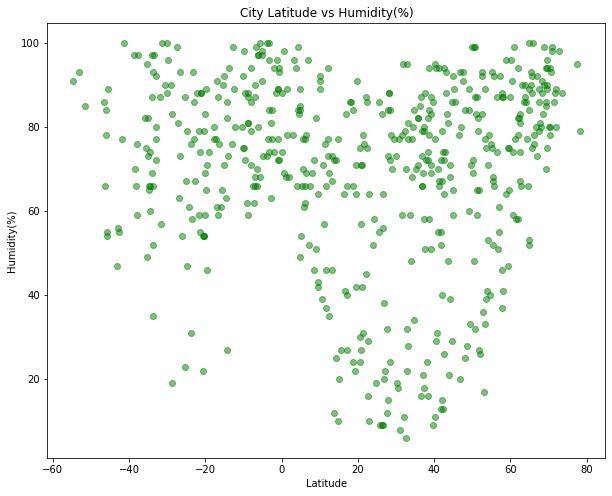

In [67]:
# Set graph size
plt.figure(figsize=(10,8))

# Create the scatter plot 'City Latitude vs Humidity(%)'
plt.scatter(Cities_df["Latitude"], Cities_df["Humidity(%)"], color='g', alpha=0.5)

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f'City Latitude vs Humidity(%)')

# Save the scatter plot as png
plt.savefig("WeatherPy_Data_Output/LatitudeVsHumidity.png")

# Display scatter plot 'City Latitude vs Humidity(%)'
plt.show()

Latitude specifies the north–south position of a point on the Earth's surface geographically. Latitude is an angle which ranges from 0° at the Equator to 90° at the poles. 

The Latitude vs Humidity plot indicates that a larger part of cities has a humidity of above 50%.

## Latitude vs. Cloudiness Plot

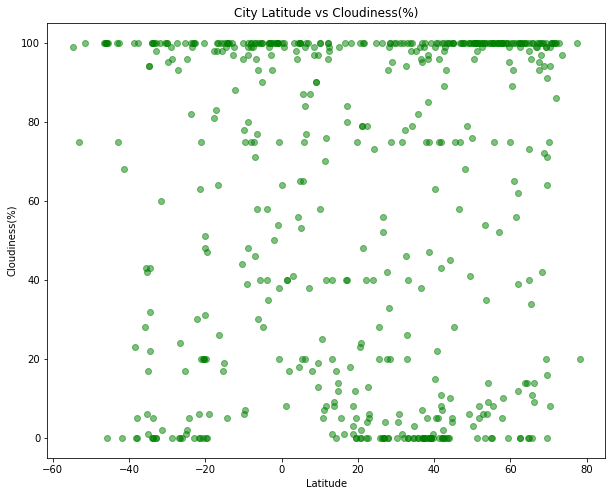

In [68]:
# Set graph size
plt.figure(figsize=(10,8))

# Create the scatter plot 'City Latitude vs Cloudiness(%)'
plt.scatter(Cities_df["Latitude"], Cities_df["Cloudiness(%)"], color='g', alpha=0.5)

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f'City Latitude vs Cloudiness(%)')

# Save the scatter plot as png
plt.savefig("WeatherPy_Data_Output/LatitudeVsCloudiness.png")

# Display scatter plot 'City Latitude vs Cloudiness(%)'
plt.show()

Latitude specifies the north–south position of a point on the Earth's surface geographically. Latitude is an angle which ranges from 0° at the Equator to 90° at the poles.

Latitude vs Cloudiness plot does not indicate any strong relationships.

## Latitude vs. Wind Speed Plot

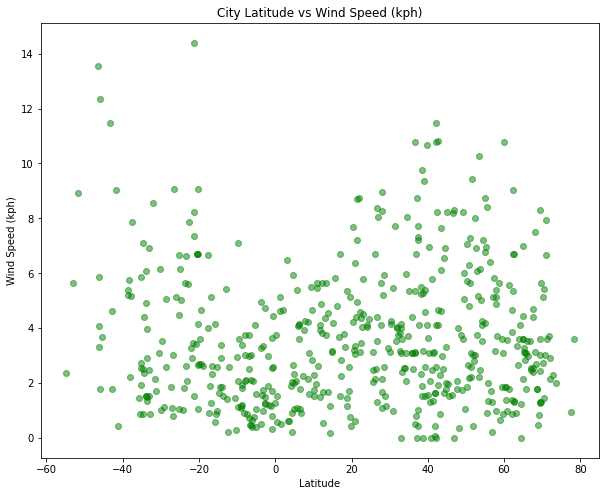

In [69]:
# Set graph size
plt.figure(figsize=(10,8))

# Create the scatter plot 'City Latitude vs Wind Speed (kph)'
plt.scatter(Cities_df["Latitude"], Cities_df["Wind Speed (kph)"], color='g', alpha=0.5)

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.title(f'City Latitude vs Wind Speed (kph)')

# Save the scatter plot as png
plt.savefig("WeatherPy_Data_Output/LatitudeVsWindSpeed.png")

# Display scatter plot 'City Latitude vs Wind Speed (kph)'
plt.show()

Latitude specifies the north–south position of a point on the Earth's surface geographically. Latitude is an angle which ranges from 0° at the Equator to 90° at the poles.

The latitude vs Wind Speed plot indicates that the majority of cities have a wind speed between 0 and 8 kph. A small minority of cities have wind speeds of up to 14 kph. These cities are close to the South Pole.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression